# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U wheel
!pip install -U "mxnet<2.0.0" bokeh==2.3.0
!pip install -U bokeh
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 2.1 MB 5.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "humanresource"
kaggle_key = "30677a7d821f8a877ce4fbec4750655a"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 67.9MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [11]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train_sample = train.sample(n=10)
train_sample

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
173,2011-01-08 12:00:00,1,0,0,2,8.20,9.090,59,23.9994,8,90,98
3732,2011-09-06 11:00:00,3,0,1,3,22.14,25.760,83,26.0027,11,78,89
3408,2011-08-11 22:00:00,3,0,1,1,28.70,32.575,48,0.0000,34,123,157
7320,2012-05-04 09:00:00,2,0,1,1,24.60,28.790,78,0.0000,32,262,294
1680,2011-04-15 22:00:00,2,1,0,2,15.58,19.695,82,26.0027,16,64,80
4399,2011-10-15 08:00:00,4,0,0,1,18.86,22.725,59,19.0012,24,101,125
6641,2012-03-14 00:00:00,1,0,1,1,22.14,25.760,60,7.0015,5,34,39
8570,2012-07-18 11:00:00,3,0,1,1,36.90,42.425,42,0.0000,47,136,183
8483,2012-07-14 20:00:00,3,0,0,1,29.52,35.605,84,6.0032,101,255,356
5193,2011-12-10 11:00:00,4,0,0,1,13.12,14.395,53,27.9993,44,192,236


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test_sample = test.sample(n=10)
test_sample

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
4135,2012-04-24 03:00:00,2,0,1,1,13.12,15.150,81,15.0013
3760,2012-03-20 12:00:00,1,0,1,1,24.60,28.790,78,16.9979
3238,2012-01-20 15:00:00,1,0,1,2,9.02,11.365,35,12.9980
2104,2011-08-31 05:00:00,3,0,1,1,22.14,25.760,83,6.0032
375,2011-02-25 08:00:00,1,0,1,3,14.76,17.425,93,8.9981
4143,2012-04-24 11:00:00,2,0,1,1,18.86,22.725,31,26.0027
5210,2012-08-22 22:00:00,3,0,1,1,26.24,30.305,73,0.0000
1856,2011-08-20 08:00:00,3,0,0,1,27.06,31.060,69,0.0000
4580,2012-05-31 16:00:00,2,0,1,1,31.16,33.335,33,19.0012
3685,2012-02-27 08:00:00,1,0,1,1,9.84,12.120,60,0.0000


In [14]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_sample = submission.sample(n=10)
submission_sample

,datetime,count
1993,2011-08-26 01:00:00,0
3069,2011-12-25 12:00:00,0
6326,2012-12-25 00:00:00,0
5712,2012-10-20 20:00:00,0
2478,2011-10-23 19:00:00,0
4998,2012-07-26 02:00:00,0
5814,2012-10-25 02:00:00,0
4650,2012-06-22 14:00:00,0
4176,2012-04-25 20:00:00,0
2701,2011-11-21 02:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [15]:
predictor = TabularPredictor(
    label='count', 
    eval_metric='root_mean_squared_error', 
    learner_kwargs={'ignored_columns': ['casual', 'registered']}
).fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220403_142651/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220403_142651/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:     

### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.103601      13.052810  562.382051                0.000712           0.586146            3       True         14
1   RandomForestMSE_BAG_L2  -53.467190       9.679592  415.725658                0.594109          26.933790            2       True         12
2          LightGBM_BAG_L2  -55.233731       9.381317  415.905590                0.295834          27.113722            2       True         11
3          CatBoost_BAG_L2  -55.366942       9.142022  451.561074                0.056539          62.769207            2       True         13
4        LightGBMXT_BAG_L2  -60.169642      12.105616  444.979186                3.020133          56.187319            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.105459    0.082221         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -53.103601      13.052810  562.382051   
 1   RandomForestMSE_BAG_L2  -53.467190       9.679592  415.725658   
 2          LightGBM_BAG_L2  -55.233731       9.381317  415.905590   
 3          CatBoost_BAG_L2  -55.366942       9.142022  451.561074   
 4        LightGBMXT_BAG_L2  -60.169642      12.105616  444.979186   
 5    KNeighborsDist_BAG_L1  -84.125061       0.105459    0.082221   
 6      WeightedEnsemble_L2  -84.125061       0.106508    1.069848   
 7    KNeighborsUnif_BAG_L1 -101.546199       0.204890    0.034200   
 8   RandomForestMSE_BAG_L1 -116.621736       0.487463   10.306702   
 9     ExtraTreesMSE_BAG_L1 -124.637158       0.486763    4.220533   
 10         CatBoost_BAG_L1 -130.501314       0.125771  197.807743   
 11         LightGBM_BAG_L1 -131.054162       1.241237   30.869426   
 12       LightGBMXT_BAG_L1 -131.460909       5.869102   69.125963   
 13  

### Create predictions from test dataset

In [17]:
predictions = predictor.predict(test)
predictions.head()

0    24.703583
1    43.460178
2    47.480907
3    50.678627
4    53.027451
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [18]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      101.361389
std        90.158791
min         3.024908
25%        20.818468
50%        65.102165
75%       167.330322
max       365.095062
Name: count, dtype: float64

In [19]:
# How many negative values do we have?
sum(predictions<0)

0

In [20]:
# Set them to zero
predictions.iloc[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [21]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [22]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 156kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [23]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-04-03 14:42:26  first raw submission               complete  1.78471      1.78471       
submission_new_hpo.csv       2022-04-02 13:11:45  new features with hyperparameters  complete  0.57764      0.57764       
submission_new_hpo.csv       2022-04-02 09:42:03  new features with hyperparameters  complete  0.47077      0.47077       
submission_new_hpo.csv       2022-04-02 09:29:00  new features with hyperparameters  complete  0.47104      0.47104       
submission_new_hpo.csv       2022-04-02 08:12:12  new features with hyperparameters  complete  0.48534      0.48534       
submission_new_features.csv  2022-04-02 07:50:40  new features                       complete  0.68957      0.68957       


#### Initial score of `1.78471`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f921ced50>,
      dtype=object)

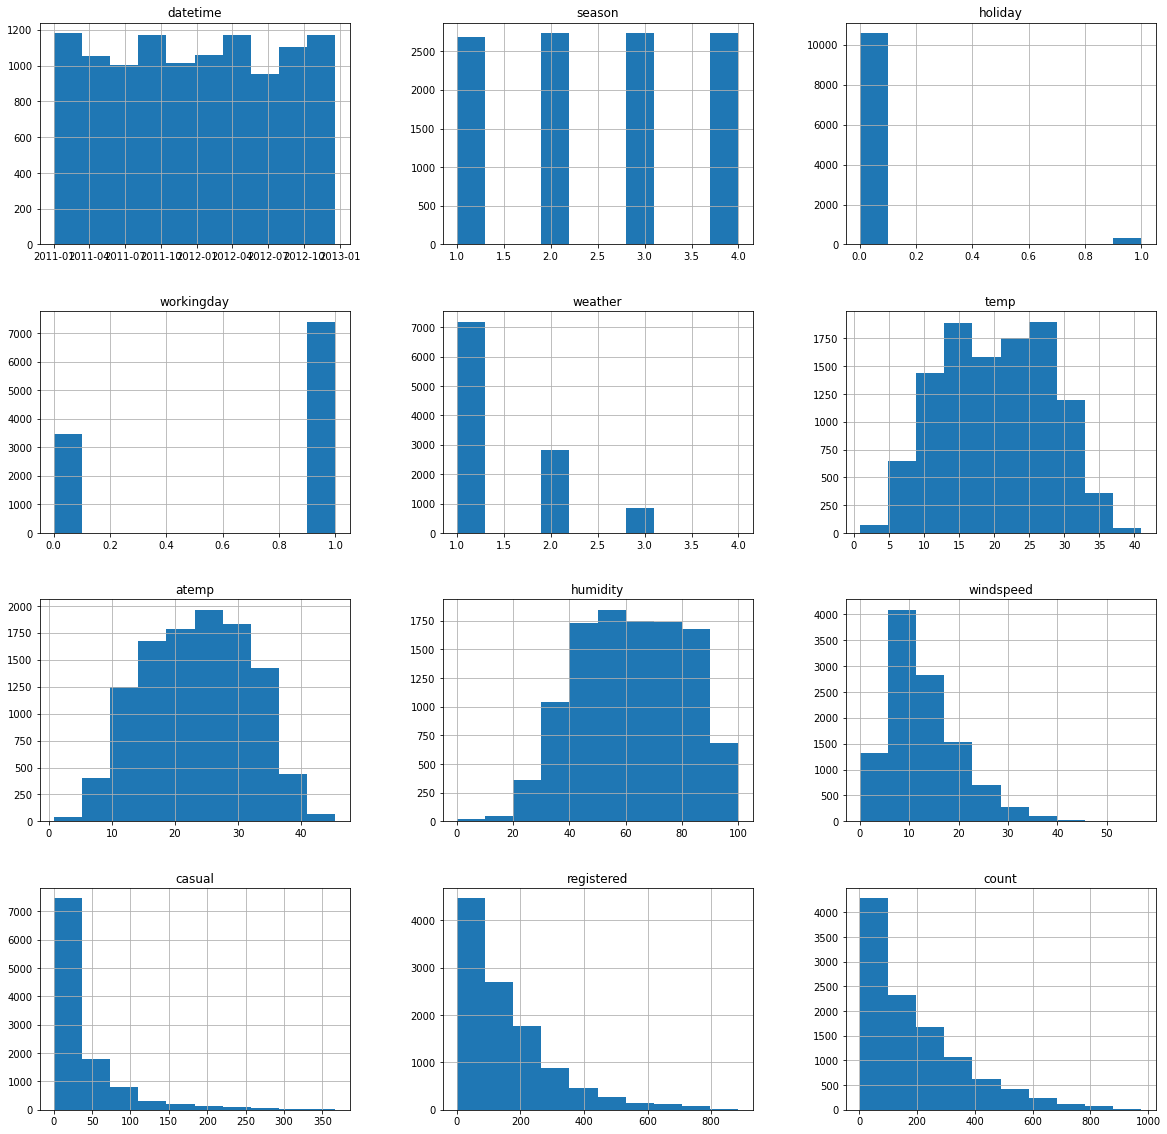

In [24]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20,20))

In [25]:
# create a new feature
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour

test['year'] = pd.to_datetime(test['datetime']).dt.year
test['month'] = pd.to_datetime(test['datetime']).dt.month
test['day'] = pd.to_datetime(test['datetime']).dt.day
test['hour'] = pd.to_datetime(test['datetime']).dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [26]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
train['holiday'] = train['holiday'].astype('category')
train['workingday'] = train['workingday'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')
test['holiday'] = test['holiday'].astype('category')
test['workingday'] = test['workingday'].astype('category')

In [29]:
# View are new feature
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: category(4), dateti

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f7fe090d0>,
      dtype=object)

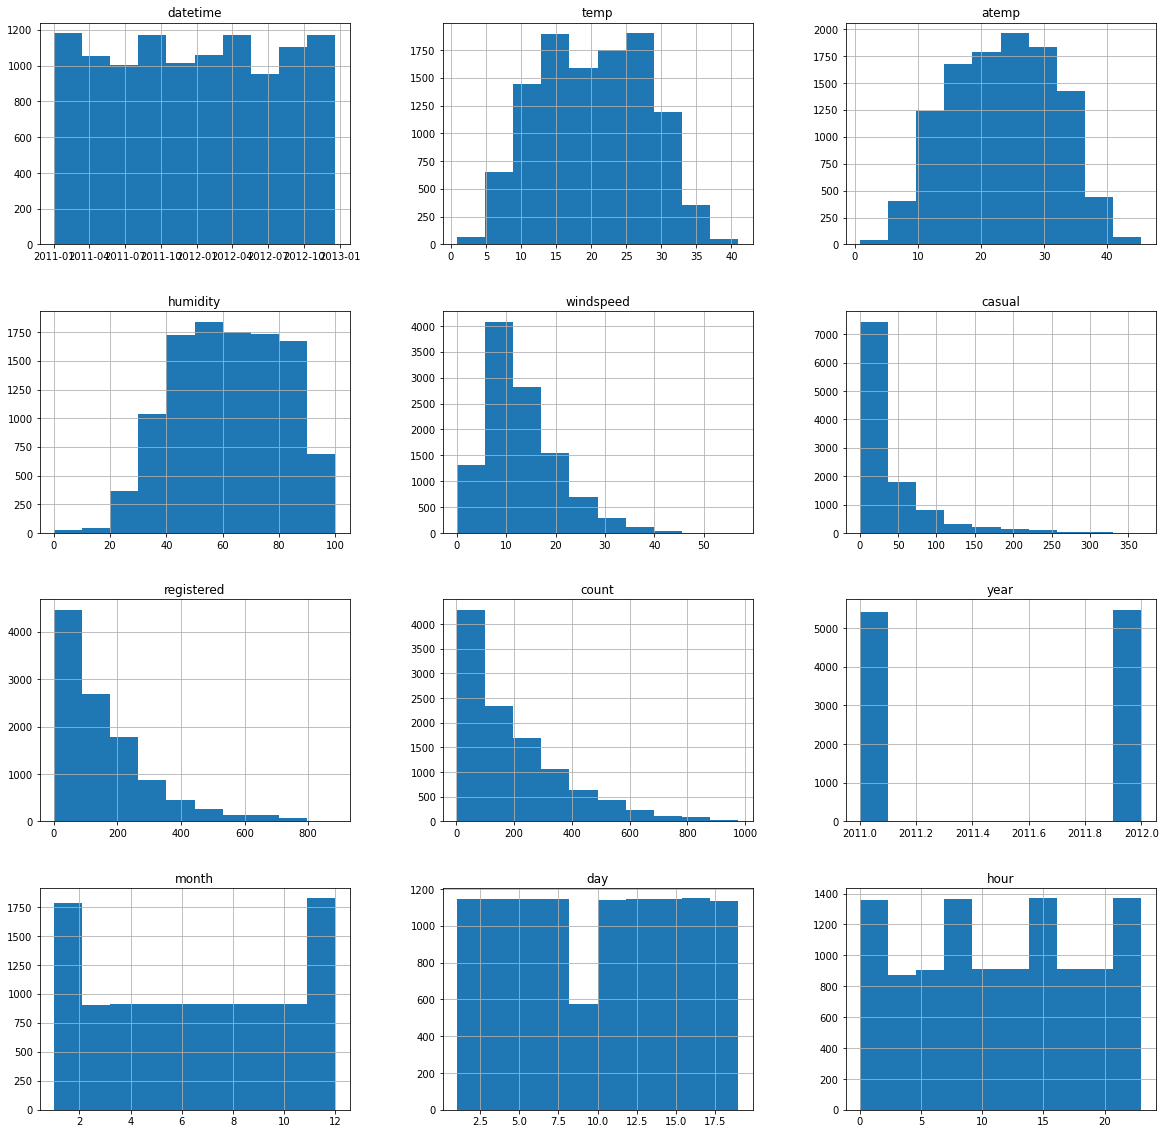

In [28]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20, 20))

## Step 5: Rerun the model with the same settings as before, just with more features

In [30]:
predictor_new_features = TabularPredictor(
    label='count', 
    eval_metric='root_mean_squared_error',
    problem_type='regression',
    learner_kwargs={'ignored_columns': ['casual', 'registered']}
).fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220403_144805/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220403_144805/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11286.1 MB
	Train Data (Original)  Memory Usage: 0.83 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting

In [31]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.986846      13.508486  534.580587                0.000765           0.424656            3       True         15
1          CatBoost_BAG_L2  -30.289359      12.176540  473.635070                0.147300          75.928141            2       True         13
2          LightGBM_BAG_L2  -30.346292      12.417493  425.679283                0.388252          27.972354            2       True         11
3        LightGBMXT_BAG_L2  -31.077665      12.972169  430.255436                0.942928          32.548506            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.352232      12.629513  407.197192                0.600272           9.490262            2       True         14
5   RandomForestMSE_BAG_L2  -31.570732      12.639598  429.161370         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -29.986846      13.508486  534.580587   
 1          CatBoost_BAG_L2  -30.289359      12.176540  473.635070   
 2          LightGBM_BAG_L2  -30.346292      12.417493  425.679283   
 3        LightGBMXT_BAG_L2  -31.077665      12.972169  430.255436   
 4     ExtraTreesMSE_BAG_L2  -31.352232      12.629513  407.197192   
 5   RandomForestMSE_BAG_L2  -31.570732      12.639598  429.161370   
 6      WeightedEnsemble_L2  -32.144253      10.845402  352.061274   
 7          LightGBM_BAG_L1  -33.917339       2.521589   44.937548   
 8          CatBoost_BAG_L1  -34.035513       0.237153  201.983607   
 9        LightGBMXT_BAG_L1  -34.345997       7.451308   90.864625   
 10    ExtraTreesMSE_BAG_L1  -38.202438       0.528169    5.651724   
 11  RandomForestMSE_BAG_L1  -38.357786       0.529441   13.383240   
 12   KNeighborsDist_BAG_L1  -84.125061       0.104788    0.037701   
 13  

In [32]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    15.089125
1    11.736769
2    11.073789
3     9.638342
4     8.224600
Name: count, dtype: float32

In [33]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0

In [34]:
submission_new_features = pd.read_csv('submission.csv', parse_dates=['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,24.703583
1,2011-01-20 01:00:00,43.460180
2,2011-01-20 02:00:00,47.480907
3,2011-01-20 03:00:00,50.678627
4,2011-01-20 04:00:00,53.027450


In [35]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [36]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 204kB/s]
Successfully submitted to Bike Sharing Demand

In [37]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-04-03 15:00:38  new features                       complete  0.69275      0.69275       
submission.csv               2022-04-03 14:42:26  first raw submission               complete  1.78471      1.78471       
submission_new_hpo.csv       2022-04-02 13:11:45  new features with hyperparameters  complete  0.57764      0.57764       
submission_new_hpo.csv       2022-04-02 09:42:03  new features with hyperparameters  complete  0.47077      0.47077       
submission_new_hpo.csv       2022-04-02 09:29:00  new features with hyperparameters  complete  0.47104      0.47104       
submission_new_hpo.csv       2022-04-02 08:12:12  new features with hyperparameters  complete  0.48534      0.48534       


#### New Score of ` 0.69275`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [50]:
#hyperparameters={'XGB': {'ag.early_stop': 500}, }

# Credit Autogluon
# https://auto.gluon.ai/stable/tutorials/tabular_prediction/tabular-indepth.html

import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 50,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                   'XGB': {'ag.early_stop': 500}
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

num_trials = 3  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [51]:
predictor_new_hpo = TabularPredictor(
    label='count', 
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ['casual', 'registered']}
).fit(train_data=train, 
      time_limit=600,  
      presets='best_quality', 
      hyperparameters= hyperparameters,
      hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20220403_152555/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220403_152555/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:     

  0%|          | 0/3 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L1/T1 ...
	-50.9748	 = Validation score   (root_mean_squared_error)
	0.36s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-44.2673	 = Validation score   (root_mean_squared_error)
	0.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-46.813	 = Validation score   (root_mean_squared_error)
	0.36s	 = Training   runtime
	0.02s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 14.99s of the 598.31s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-33.553	 = Validation score   (root_mean_squared_error)
	5.72s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-32.2563	 = Validation score   (root_mean_squared_error)
	7.07s	 = Training   runtime
	0.1s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 14.99s of the 584.96s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Ran out of time, stopping training early. (Stopping on epoch 7)
	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L1/T1 ...
	-98.7935	 = Validation score   (root_mean_squared_error)
	4.94s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/T2 ...
	-60.3232	 = Validation score   (root_mean_squared_error)
	6.4s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T1 ... Training model for up to 373.29s of the 573.28s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-52.0892	 = Validation score   (root_mean_squared_error)
	17.7s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T2 ... Training model for up to 352.12s of the 552.11s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-46.3615	 = Validation score   (root_mean_squared_error)
	17.24s	 = Training   ru

  0%|          | 0/3 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L2/T1 ...
	-38.7231	 = Validation score   (root_mean_squared_error)
	0.42s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-36.6111	 = Validation score   (root_mean_squared_error)
	0.39s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-38.8546	 = Validation score   (root_mean_squared_error)
	0.45s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 10.13s of the 268.46s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-36.6492	 = Validation score   (root_mean_squared_error)
	3.35s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	-36.237	 = Validation score   (root_mean_squared_error)
	3.11s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 10.13s of the 261.75s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L2/T1 ...
	-37.7702	 = Validation score   (root_mean_squared_error)
	4.91s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T1 ... Training model for up to 256.6s of the 256.59s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-36.1982	 = Validation score   (root_mean_squared_error)
	17.33s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T2 ... Training model for up to 236.63s of the 236.61s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-34.0534	 = Validation score   (root_mean_squared_error)
	17.7s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T3 ... Training model for up to 215.02s of the 215.0s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy

In [52]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L2 -33.324797       7.405899  199.909639                0.001101           0.889697            2       True          8
1        WeightedEnsemble_L3 -33.400290      11.712461  406.112799                0.000752           0.650090            3       True         15
2          XGBoost_BAG_L2/T2 -33.596097      11.022410  335.781842                2.705627          34.636666            2       True         13
3          XGBoost_BAG_L1/T2 -33.794673       3.861788   75.532645                3.861788          75.532645            1       True          5
4         LightGBM_BAG_L2/T2 -34.053379       8.419787  318.844214                0.103003          17.699038            2       True         10
5          XGBoost_BAG_L2/T1 -34.202570      11.182951  335.772931  

{'leaderboard':                        model  score_val  pred_time_val    fit_time  \
 0        WeightedEnsemble_L2 -33.324797       7.405899  199.909639   
 1        WeightedEnsemble_L3 -33.400290      11.712461  406.112799   
 2          XGBoost_BAG_L2/T2 -33.596097      11.022410  335.781842   
 3          XGBoost_BAG_L1/T2 -33.794673       3.861788   75.532645   
 4         LightGBM_BAG_L2/T2 -34.053379       8.419787  318.844214   
 5          XGBoost_BAG_L2/T1 -34.202570      11.182951  335.772931   
 6          XGBoost_BAG_L1/T1 -34.620837       3.022606   46.890793   
 7   NeuralNetTorch_BAG_L2/T1 -34.733491       8.903079  353.127005   
 8         LightGBM_BAG_L2/T1 -36.198233       8.444541  318.476228   
 9         LightGBM_BAG_L2/T3 -36.250365       8.458247  319.078919   
 10        LightGBM_BAG_L1/T2 -46.361519       0.114112   17.240679   
 11        LightGBM_BAG_L1/T3 -48.234307       0.185391   17.425005   
 12        LightGBM_BAG_L1/T1 -52.089174       0.096144   17.6

In [53]:
predictions_with_new_hpo = predictor_new_hpo.predict(test)
predictions_with_new_hpo.head()

0    16.640999
1     1.441075
2    -0.275892
3    -0.157587
4    -0.143919
Name: count, dtype: float32

In [54]:
# Remember to set all negative values to zero
predictions_with_new_hpo[predictions_with_new_hpo<0] = 0

In [55]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [56]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_with_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [57]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 187k/187k [00:01<00:00, 145kB/s]
Successfully submitted to Bike Sharing Demand

In [58]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-04-03 15:35:42  new features with hyperparameters  complete  0.60173      0.60173       
submission_new_hpo.csv       2022-04-03 15:13:20  new features with hyperparameters  complete  0.45536      0.45536       
submission_new_features.csv  2022-04-03 15:00:38  new features                       complete  0.69275      0.69275       
submission.csv               2022-04-03 14:42:26  first raw submission               complete  1.78471      1.78471       


#### New Score of `0.60173`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

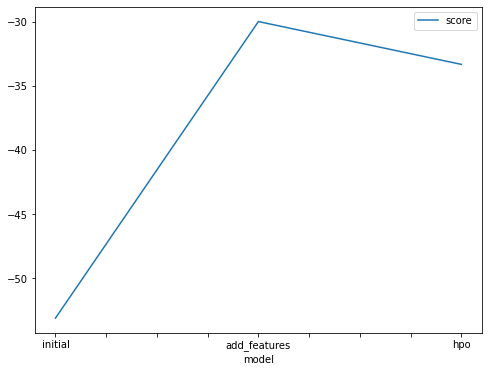

In [59]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.103601, -29.986846, -33.324797]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

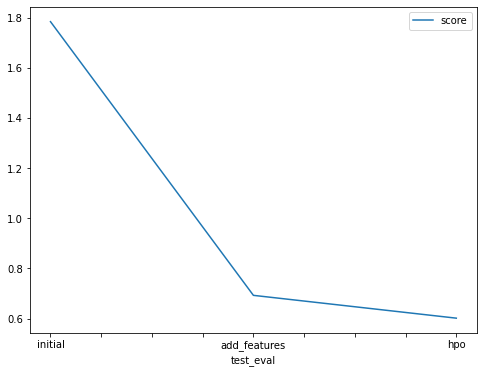

In [60]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78471, 0.69275, 0.60173]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [67]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default', 'default', 'GBM, \'num_boost_round\': 50, \'num_leaves\': ag.space.Int(lower=26, upper=66, default=36)'],
    "hpo2": ['default', 'default', 'NN \'num_epochs\': 10, \'learning_rate\':[1e-4, 1e-2, default=5e-4, log=True], \'activation\': [\'relu\', \'softrelu\', \'tanh\'], \'dropout_prob\': [0.0, 0.5, default=0.1]'],
    "hpo3": ['default', 'default', 'XGB early_stop: 500'],
    "score": [1.78471, 0.69275,  0.60173]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.78471
1,add_features,default,default,default,0.69275
2,hpo,"GBM, 'num_boost_round': 50, 'num_leaves': ag.space.Int(lower=26, upper=66, default=36)","NN 'num_epochs': 10, 'learning_rate':[1e-4, 1e-2, default=5e-4, log=True], 'activation': ['relu', 'softrelu', 'tanh'], 'dropout_prob': [0.0, 0.5, default=0.1]",XGB early_stop: 500,0.60173
